In [24]:
# Combine csv files
import pandas as pd

def append_csv_files(file1, file2, output_file):
    """
    Append two CSV files with the same column names and save to a new CSV file.
    
    Parameters:
    - file1: str, path to the first CSV file.
    - file2: str, path to the second CSV file.
    - output_file: str, path to save the appended CSV file.
    """
    # Read the two CSV files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    
    # Append the second DataFrame to the first
    appended_df = pd.concat([df1, df2], ignore_index=True)
    
    # Save the result to a new CSV file
    appended_df.to_csv(output_file, index=False)

# Example usage
if __name__ == "__main__":
    file1 = 'initial_metrics.csv'  # Replace with your first CSV file path
    file2 = 'metrics_fiche_technique.csv'  # Replace with your second CSV file path
    output_file = 'complete_metrics.csv'  # Path to save the appended CSV
    append_csv_files(file1, file2, output_file)


In [26]:
# Import data
import csv
import numpy as np

def read_columns_from_csv(file_path, columns):
    """
    Read specified columns from a CSV file and return lists of elements.
    
    Parameters:
    - file_path: str, path to the CSV file.
    - columns: list of str, column names to read.
    
    Returns:
    - A list of lists, each containing elements of the specified columns.
    """
    data = {col: [] for col in columns}  # Initialize lists for each column
    with open(file_path, newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            for col in columns:
                if col in row:
                    data[col].append(row[col])
    
    return [data[col] for col in columns]  # Return only the lists of the specified columns




# Example usage
file_path = 'complete_metrics.csv'
columns_to_read = ['Mean resolution (mm)', 'Resolution uncertainty (mm)', 'Mean contrast (mm)', 'Contrast uncertainty (mm)']
data = read_columns_from_csv(file_path, columns_to_read)
data = [[float(y) for y in x] for x in data]
data = np.array(data)

#print(data)

C:\Users\sdesr\AppData\Local\Temp\ipykernel_10220\3414502384.py:34: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  ax1.set_xlim(left=np.min(x) - 100, right=np.max(x)+ 10000)


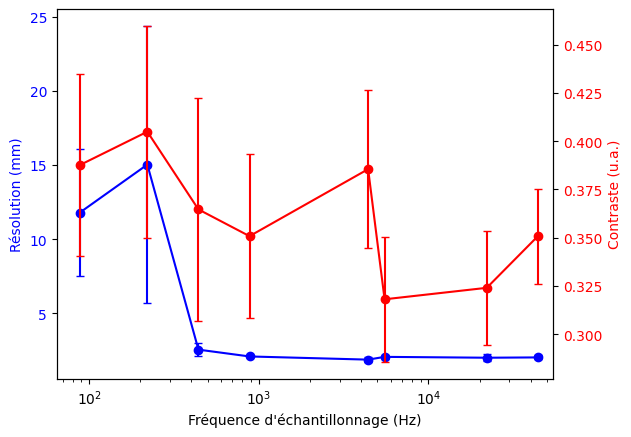

In [52]:
# Plot sampling frequency
import matplotlib.pyplot as plt

f0 = 44100 #Hz
factor = np.array([1,2,8,10,50,100,200,500])
fs = f0/factor
res = data[0,:8]
r_inc = data[1,:8]
cont = data[2,:8]
c_inc = data[3,:8]

# Sample data
x = fs
y1 = res  # Data for the left y-axis
y2 = cont  # Data for the right y-axis

# Sample error data
error1 = r_inc  # Error for the sine data
error2 = c_inc         # Error for the exponential data

# Create a figure and an axis
fig, ax1 = plt.subplots()

# Plotting the first dataset on the left y-axis with error bars
ax1.errorbar(x, y1, yerr=error1, fmt='-o', color='blue', capsize=3)
ax1.set_xlabel("Fréquence d'échantillonnage (Hz)")
ax1.set_ylabel('Résolution (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-axis to logarithmic scale
ax1.set_xscale('log')

# Set x-axis limits to avoid blank space
ax1.set_xlim(left=np.min(x) - 100, right=np.max(x)+ 10000)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plotting the second dataset on the right y-axis with error bars
ax2.errorbar(x, y2, yerr=error2, fmt='-o', color='red', capsize=3)
ax2.set_ylabel('Contraste (u.a.)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

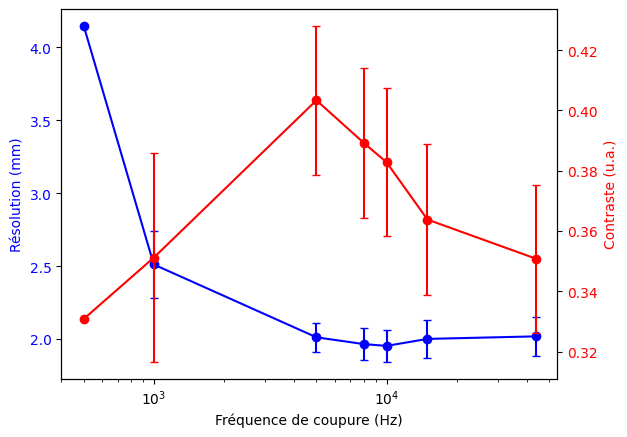

In [60]:
# Plot low-pass filter

fmax = [44100, 15000,10000,8000,5000,1000,500]
res = np.concatenate(([data[0,0]],data[0,8:14]))
r_inc = np.concatenate(([data[1,0]],data[1,8:14]))
cont = np.concatenate(([data[2,0]],data[2,8:14]))
c_inc = np.concatenate(([data[3,0]],data[3,8:14]))

# Sample data
x = fmax
y1 = res  # Data for the left y-axis
y2 = cont  # Data for the right y-axis

# Sample error data
error1 = r_inc  # Error for the sine data
error2 = c_inc         # Error for the exponential data

# Create a figure and an axis
fig, ax1 = plt.subplots()

# Plotting the first dataset on the left y-axis with error bars
ax1.errorbar(x, y1, yerr=error1, fmt='-o', color='blue', capsize=3)
ax1.set_xlabel("Fréquence de coupure (Hz)")
ax1.set_ylabel('Résolution (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-axis to logarithmic scale
ax1.set_xscale('log')

# Set x-axis limits to avoid blank space
ax1.set_xlim(left=np.min(x) - 100, right=np.max(x)+ 10000)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plotting the second dataset on the right y-axis with error bars
ax2.errorbar(x, y2, yerr=error2, fmt='-o', color='red', capsize=3)
ax2.set_ylabel('Contraste (u.a.)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()

[0.02464752 0.02464738 0.02464558 0.02450364 0.02543444 0.05432386
 0.08503654 0.         0.        ]


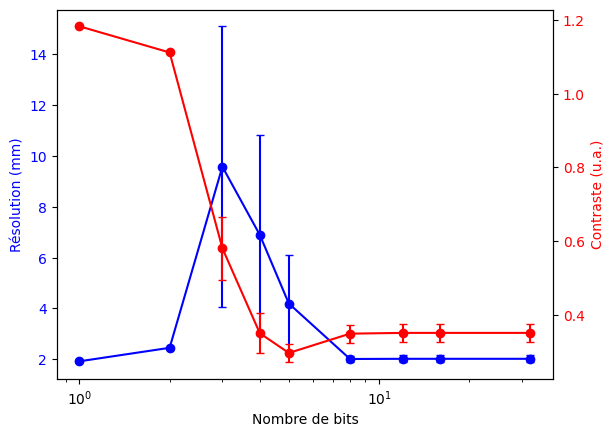

In [64]:
# Plot bit

nbits = [32,16,12,8,5,4,3,2,1]
res = np.concatenate(([data[0,0]],data[0,14:22]))
r_inc = np.concatenate(([data[1,0]],data[1,14:22]))
cont = np.concatenate(([data[2,0]],data[2,14:22]))
c_inc = np.concatenate(([data[3,0]],data[3,14:22]))
print(c_inc)

# Sample data
x = nbits
y1 = res  # Data for the left y-axis
y2 = cont  # Data for the right y-axis

# Sample error data
error1 = r_inc  # Error for the sine data
error2 = c_inc         # Error for the exponential data

# Create a figure and an axis
fig, ax1 = plt.subplots()

# Plotting the first dataset on the left y-axis with error bars
ax1.errorbar(x, y1, yerr=error1, fmt='-o', color='blue', capsize=3)
ax1.set_xlabel("Nombre de bits")
ax1.set_ylabel('Résolution (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-axis to logarithmic scale
ax1.set_xscale('log')

# Set x-axis limits to avoid blank space
#ax1.set_xlim(left=np.min(x) - 100, right=np.max(x)+ 10000)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plotting the second dataset on the right y-axis with error bars
ax2.errorbar(x, y2, yerr=error2, fmt='-o', color='red', capsize=3)
ax2.set_ylabel('Contraste (u.a.)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.show()